In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import numpy as np


In [46]:
df = pd.read_pickle('df_num')

In [47]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df)

In [48]:
y_pred is kmeans.labels_

for i in y_pred:
    print(i)

3
3
3
3
3
4
4
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
4
3
2
3
3
3
3
3
3
3
3
2
3
4
3
3
3
3
3
3
3
0
4
3
0
3
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
3
3
0
0
3
0
0
3
2
0
3
0
0
0
0
0
0
3
0
0
0
2
3
0
0
0
0
3
0
0
0
0
3
0
3
0
0
0
3
3
3
3
0
3
0
0
2
0
0
3
0
3
0
0
0
3
0
0
0
3
3
3
2
4
0
0
3
3
0
2
2
0
3
3
0
2
3
3
3
3
0
3
3
3
0
3
3
2
2
0
3
0
3
0
0
3
0
3
0
3
0
0
3
3
0
0
3
0
0
3
3
3
3
0
3
0
3
3
0
2
3
0
0
0
0
0
0
0
0
3
3
0
3
3
2
0
3
3
3
3
0
3
2
3
0
0
3
2
0
3
3
3
0
4
0
0
3
3
0
0
0
3
0
3
3
0
3
0
3
0
3
3
2
3
0
0
0
4
0
0
3
0
3
2
0
0
0
3
0
3
0
3
0
0
3
0
3
0
0
2
3
0
0
3
3
3
0
0
3
0
3
0
0
3
0
3
3
3
0
0
3
0
0
2
4
3
4
3
0
3
0
0
0
0
3
3
3
3
0
0
3
0
0
3
0
3
0
2
0
0
0
2
3
0
3
3
0
3
0
3
0
3
3
3
4
3
3
3
3
3
3
3
0
3
0
3
3
2
3
0
0
0
3
0
0
0
0
3
0
0
3
2
0
0
3
0
0
3
0
3
3
0
0
0
3
2
3
3
3
3
3
3
2
2
3
0
3
3
3
0
3
2
0
3
0
3
0
3
3
3
3
3
3
0
0
0
0
0
3
0
2
0
3
3
2
0
3
3
3
0
0
3
0
3
3
3
0
3
3
0
0
0
0
3
2
0
3
3
3
2
2
4
0
0


In [49]:
kmeans.cluster_centers_

array([[ 2.12011205e+02,  8.79778667e-01, -2.25675075e+00,
         8.31228230e+00,  2.21030190e+00, -2.25675075e+00,
         6.38070550e+01,  3.27839893e+00,  1.79919499e+00,
         3.05433810e+00,  5.51031418e+01,  2.10230725e+01,
         1.40496422e+00,  9.92620751e-01],
       [ 4.90952863e+03, -1.30104000e+01, -3.67322328e+00,
         2.84938522e+00,  8.15935941e+00, -3.67322328e+00,
         1.97007960e+03,  9.01600000e+01,  5.86800000e+01,
         1.30400000e+02,  1.19225360e+03,  4.38064873e+02,
         2.14000000e+01,  1.11022302e-16],
       [ 7.39603703e+02,  2.32235468e+00, -4.33308106e+00,
         6.87830920e+00,  3.35564296e+00, -4.33308106e+00,
         2.08039379e+02,  1.07389163e+01,  5.29359606e+00,
         1.40128079e+01,  1.83078621e+02,  7.30451142e+01,
         4.36650246e+00,  1.35960591e-01],
       [ 3.99025324e+02,  2.30094718e+00, -3.83208314e+00,
         8.79320659e+00,  2.78186949e+00, -3.83208314e+00,
         9.85144554e+01,  5.27062656e+00,  2.

Kmeans aplicado diretamente com as 2 primeiras colunas do DF (peso molecular e logP)

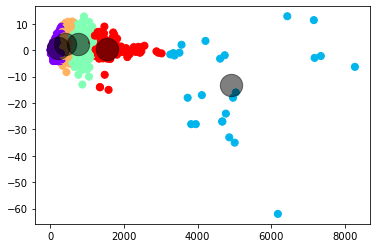

In [64]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

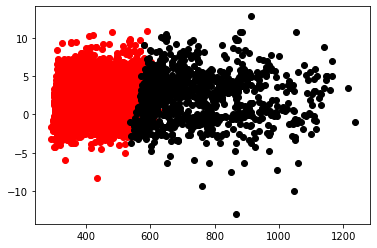

In [52]:
#filter rows of original data
filtered_label2 = df[y_pred == 3]
 
filtered_label8 = df[y_pred == 2]
 
#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'black')
plt.show()

aplicaçao metodo elbow e aplicação do kmeans com o dado tratado no standardscaler com base visto em https://realpython.com/k-means-clustering-python/

In [102]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [104]:
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = StandardScaler()

dfscaled = standard_scaler.fit_transform(df)


pca = PCA(n_components=2)

pComp = pca.fit_transform(dfscaled)


1 143692.7079173907
2 95280.9024674446
3 65285.484910058316
4 43326.37583176061
5 34150.08980249738
6 28427.466579526743
7 24089.109567789124
8 21003.321577217113
9 18012.971616047325
10 16285.310711671123


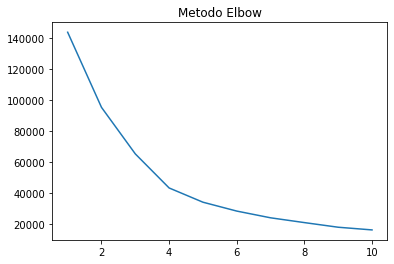

In [105]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit(pComp)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')

plt.show()

In [106]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(pComp)


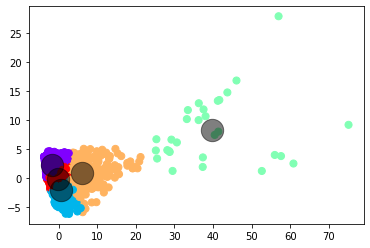

In [107]:
plt.scatter(pComp[:, 0], pComp[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

In [88]:
# #Importing required modules
 
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import numpy as np
# from sklearn.cluster import KMeans
 
# #Initialize the class object
# kmeans = KMeans(n_clusters= 4)
 
# #predict the labels of clusters.
# label = kmeans.fit_predict(dfscaled)
 
# #Getting unique labels
# u_labels = np.unique(label)
 
# #plotting the results:
# for i in u_labels:
#     plt.scatter(dfscaled[label == i , 0] , dfscaled[label == i , 1] , label = i)
# plt.legend()
# plt.show()

Aplicação do PCA e clusterização

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(df)


In [98]:
pca.explained_variance_ratio_


array([0.96821802, 0.02671609])

In [99]:
for i in X2D:
    print(i)

[1.32125412e-18 2.56242845e-12]
[ 8.52992557e-13 -1.26577996e-16]
[ 8.52992383e-13 -3.36594387e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900618e-13]
[2018.30556941  139.58921434]
[919.12224918  22.04569893]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[996.14246273  66.64492474]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[1541.45859675 -100.63120223]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 8.52992383e-13 -3.36900617e-13]
[ 

In [100]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X2D)
kmeans.cluster_centers_

array([[-1.82001794e+02,  2.20346735e+01],
       [ 1.28441828e+01, -9.50601649e+00],
       [ 5.02861455e+03,  2.21319759e+02],
       [ 1.26619320e+03, -1.96777025e+00],
       [ 3.81248834e+02, -2.19353780e+01]])

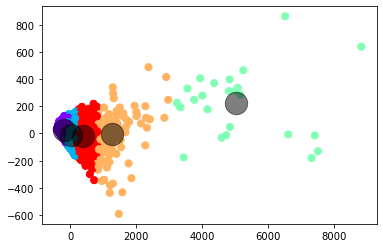

In [101]:
plt.scatter(X2D[:, 0], X2D[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)